In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.svm import SVC

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/STUDENT PROFILE NEW.docx
/content/drive/MyDrive/IMG-20210222-WA0000.jpg
/content/drive/MyDrive/IMG-20210330-WA0038.jpg
/content/drive/MyDrive/20WH1A1268.docx
/content/drive/MyDrive/IMG_20210429_124334.jpg
/content/drive/MyDrive/WH_Your College Students_Alloted to Host Colleges for B.Tech 1st year Regular and Supply Provistional Reports.xls
/content/drive/MyDrive/IMG20210906153734.jpg
/content/drive/MyDrive/wh-TSHEETS_BTECH_1-1_JULY-2021_EXAMS_06-09-2021.zip
/content/drive/MyDrive/Copy of IMG_20210429_124334.jpg
/content/drive/MyDrive/wh-TSHEETS_BTECH_I-II_R18_REGULAR_SEP-2021_EXAMS_16-12-2021.zip
/content/drive/MyDrive/WH-12-I B.Tech. II Semester (R18) Regular.xlsx
/content/drive/MyDrive/introduction_to_matrices.ipynb
/content/drive/MyDrive/data_cleaning.ipynb
/content/drive/MyDrive/Copy_of_IntroductiontoMatplotlib1 (1).ipynb
/content/drive/MyDrive/Managing_Nulls.ipynb
/content/drive/MyDrive/IntroductiontoPandas2.ipynb
/content/drive/MyDrive/IntroductiontoPandas1

In [4]:
# Load biomarker data
biomarker_data = pd.read_csv('/content/drive/MyDrive/50lung/200bio.csv')


In [5]:
# Specify the directory paths for images
image_directory = '/content/drive/MyDrive/50lung/200/'


In [6]:
# Generate image paths for the dataset
all_image_paths = [os.path.join(image_directory, f"{i}.jpeg") for i in range(1,201)]


In [7]:
# Merge image features with biomarker data
def process_images(image_paths):
    image_features = []
    base_model = VGG16(weights='imagenet', include_top=False)

    for img_path in image_paths:
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        features = base_model.predict(img_array)
        image_features.append(features.flatten())

    return image_features

In [8]:
# Process images
image_features = process_images(all_image_paths)
image_df = pd.DataFrame(image_features)

1/1 [==============================] - 0s 465ms/step


In [9]:

# Merge image features with biomarker data
merged_data = pd.concat([biomarker_data, image_df], axis=1)

In [10]:

# Convert 'Level' to binary values for training
y = merged_data['Level'].apply(lambda x: 0 if x == 'Low' else 1)

In [11]:

# Columns to drop
columns_to_drop = ['Level', 'index', 'Patient Id','Age','Gender']

In [12]:

# Drop unnecessary columns
X = merged_data.drop(columns=columns_to_drop, axis=1)


In [13]:
# Split the data into training and testing sets (20-80 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Preprocess the data using ColumnTransformer and Pipeline
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

In [15]:
# SVM model
model_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])


In [16]:

# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


Logistic Regression Confusion Matrix:
[[ 9  0]
 [ 0 31]]
Logistic Regression Accuracy: 1.0
Logistic Regression Precision: 1.0
Logistic Regression Recall: 1.0
Logistic Regression F1 Score: 1.0


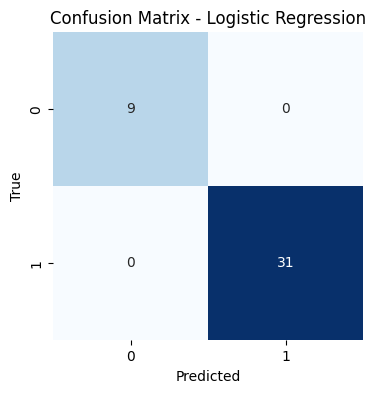

In [26]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
model_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Fit the pipeline on the training data
model_logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = model_logreg.predict(X_test)

# Evaluate the Logistic Regression model
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

# Print the results for Logistic Regression
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Logistic Regression Precision:", precision_logreg)
print("Logistic Regression Recall:", recall_logreg)
print("Logistic Regression F1 Score:", f1_logreg)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Random Forest Confusion Matrix:
[[ 9  0]
 [ 0 31]]
Random Forest Accuracy: 1.0
Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1 Score: 1.0


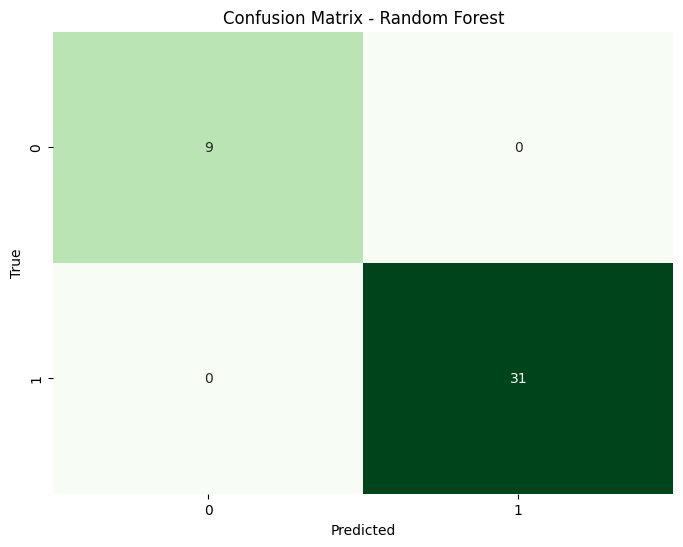

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the training data
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluate the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the results for Random Forest
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [28]:
# Fit the pipeline on the training data
model_svm.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
       'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity',
       'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood',
       'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring'],
      dtype='object'))])),
                ('classifier', SVC(random_state=42))])

In [29]:
# Make predictions
y_pred_svm = model_svm.predict(X_test)

In [31]:
# Evaluate the SVM model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print the results for SVM
print("SVM Confusion Matrix:")
print(conf_matrix_svm)
print("SVM Accuracy:", accuracy_svm)
from sklearn.metrics import f1_score, recall_score

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
# Replace 'y_true' and 'y_pred' with your actual variable names

f1 = f1_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)

print(f'F1 Score: {f1}')
print(f'Recall: {recall}')


SVM Confusion Matrix:
[[ 8  1]
 [ 0 31]]
SVM Accuracy: 0.975
F1 Score: 0.9841269841269841
Recall: 1.0


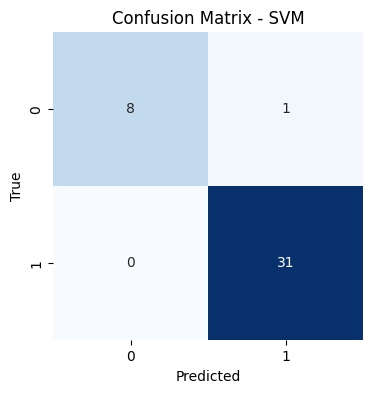

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot confusion matrix for SVM
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
